In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. Daten einlesen und vorbereiten
df = pd.read_csv("Students Social Media Addiction.csv")

In [3]:
# Dummy-Variable für TikTok-Nutzung
df["TikTok_User"] = (df["Most_Used_Platform"] == "TikTok").astype(int)

In [4]:
# Interaktionsterm
df["Usage_TikTok_Interaction"] = df["Avg_Daily_Usage_Hours"] * df["TikTok_User"]

In [5]:
# 2. Regressionsmodell schätzen
model = smf.ols("Addicted_Score ~ Avg_Daily_Usage_Hours + TikTok_User + Usage_TikTok_Interaction", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     646.2
Date:                Mon, 12 May 2025   Prob (F-statistic):          2.75e-201
Time:                        23:25:04   Log-Likelihood:                -858.17
No. Observations:                 705   AIC:                             1724.
Df Residuals:                     701   BIC:                             1743.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [6]:
# 3. Interpretation der Regressionskoeffizienten
b0 = model.params['Intercept']
b1 = model.params['Avg_Daily_Usage_Hours']
b2 = model.params['TikTok_User']
b3 = model.params['Usage_TikTok_Interaction']

In [7]:
# Zusammenhang für Nicht-TikTok-Nutzer:innen (TikTok_User = 0):
print("\nNicht-TikTok-Nutzer:innen:")
print(f"Addicted_Score = {b0:.2f} + {b1:.2f} * Usage")


Nicht-TikTok-Nutzer:innen:
Addicted_Score = 1.08 + 1.06 * Usage


In [8]:
# Zusammenhang für TikTok-Nutzer:innen (TikTok_User = 1):
print("\nTikTok-Nutzer:innen:")
print(f"Addicted_Score = {b0 + b2:.2f} + ({b1 + b3:.2f}) * Usage")


TikTok-Nutzer:innen:
Addicted_Score = 3.49 + (0.74) * Usage


In [9]:
# Erwarteter Addicted Score bei 3 Stunden Nutzung
usage = 3
score_tiktok = b0 + b1 * usage + b2 * 1 + b3 * usage
score_other = b0 + b1 * usage

print(f"\nErwarteter Addicted Score bei 3h Nutzung:")
print(f"- TikTok-Nutzer:innen: {score_tiktok:.2f}")
print(f"- Andere Plattformen:  {score_other:.2f}")


Erwarteter Addicted Score bei 3h Nutzung:
- TikTok-Nutzer:innen: 5.70
- Andere Plattformen:  4.26


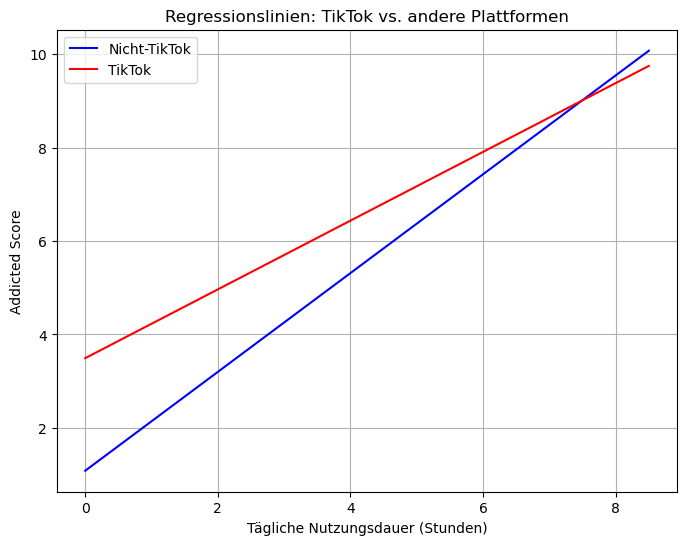

In [10]:
# 4. Visualisierung der Regressionslinien
x = np.linspace(0, df["Avg_Daily_Usage_Hours"].max(), 100)
y_other = b0 + b1 * x
y_tiktok = (b0 + b2) + (b1 + b3) * x

plt.figure(figsize=(8, 6))
plt.plot(x, y_other, label="Nicht-TikTok", color='blue')
plt.plot(x, y_tiktok, label="TikTok", color='red')
plt.xlabel("Tägliche Nutzungsdauer (Stunden)")
plt.ylabel("Addicted Score")
plt.title("Regressionslinien: TikTok vs. andere Plattformen")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# 5. Reflexion Interaktionsterm
print("\nInterpretation des Interaktionsterms:")
print(f"Der Interaktionsterm ({b3:.2f}) zeigt an, wie stark sich der Effekt der Nutzungsdauer auf den Addicted Score bei TikTok-Nutzer:innen im Vergleich zu anderen Plattformen verändert.")
print("Wenn b3 > 0 ist, bedeutet das: Bei TikTok-Nutzer:innen steigt der Addicted Score stärker pro Stunde Nutzung als bei anderen.")


Interpretation des Interaktionsterms:
Der Interaktionsterm (-0.32) zeigt an, wie stark sich der Effekt der Nutzungsdauer auf den Addicted Score bei TikTok-Nutzer:innen im Vergleich zu anderen Plattformen verändert.
Wenn b3 > 0 ist, bedeutet das: Bei TikTok-Nutzer:innen steigt der Addicted Score stärker pro Stunde Nutzung als bei anderen.


# Qualitative Prädiktoren und Polynomterme

In [18]:
df["Instagram_User"] = (df["Most_Used_Platform"] == "Instagram").astype(int)
df["YouTube_User"] = (df["Most_Used_Platform"] == "YouTube").astype(int)
df["WhatsApp_User"] = (df["Most_Used_Platform"] == "WhatsApp").astype(int)

In [19]:
# Quadratischer Term für Nutzungsdauer
df["Usage_Squared"] = df["Avg_Daily_Usage_Hours"] ** 2

In [24]:
# Plattform-Dummies: z. B. Referenz = Instagram → NICHT in die Formel aufnehmen
platform_vars = [
    "TikTok_User",
    "YouTube_User",
    "WhatsApp_User",
    "Instagram_User"
    # ggf. weitere Plattformen ergänzen
]

In [25]:
# Regressionsformel dynamisch zusammensetzen
formula = "Addicted_Score ~ Avg_Daily_Usage_Hours + Usage_Squared"
for var in platform_vars:
    formula += f" + {var}"

In [26]:
# Modell schätzen
model = smf.ols(formula=formula, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     372.0
Date:                Tue, 13 May 2025   Prob (F-statistic):          1.37e-213
Time:                        00:16:20   Log-Likelihood:                -819.89
No. Observations:                 705   AIC:                             1654.
Df Residuals:                     698   BIC:                             1686.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.15

In [27]:
# Optionale Ausgabe der Gleichung (aufgerundet)
print("\nRegressionsgleichung:")
print(f"Addicted_Score = {model.params['Intercept']:.2f} "
      f"+ {model.params['Avg_Daily_Usage_Hours']:.2f} * Usage "
      f"+ {model.params['Usage_Squared']:.2f} * Usage^2")

for var in platform_vars:
    print(f"+ {model.params[var]:.2f} * {var}")


Regressionsgleichung:
Addicted_Score = -0.16 + 1.52 * Usage + -0.05 * Usage^2
+ 0.96 * TikTok_User
+ 0.93 * YouTube_User
+ -0.08 * WhatsApp_User
+ 0.59 * Instagram_User


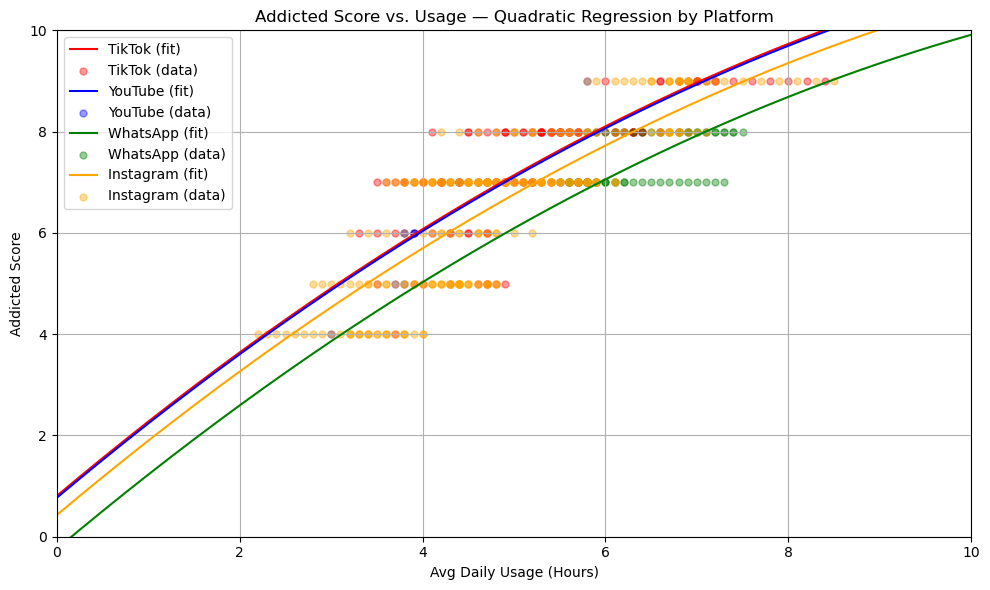

In [30]:
# Step 2: Regression coefficients from your model
b0 = -0.1551
b1 = 1.5169
b2 = -0.0502
shifts = {
    "TikTok": 0.9649,
    "YouTube": 0.9275,
    "WhatsApp": -0.0820,
    "Instagram": 0.5874
}
colors = {
    "TikTok": "red",
    "YouTube": "blue",
    "WhatsApp": "green",
    "Instagram": "orange"
}

# Step 3: Create x-range for prediction
x = np.linspace(0, 10, 200)
x_sq = x**2

# Step 4: Plot
plt.figure(figsize=(10, 6))

for platform, shift in shifts.items():
    # Predicted regression curve
    y_pred = b0 + b1 * x + b2 * x_sq + shift
    plt.plot(x, y_pred, label=f"{platform} (fit)", color=colors[platform])
    
    # Data points
    mask = df[f"{platform}_User"] == 1
    plt.scatter(
        df.loc[mask, "Avg_Daily_Usage_Hours"],
        df.loc[mask, "Addicted_Score"],
        color=colors[platform],
        alpha=0.4,
        s=25,
        label=f"{platform} (data)"
    )

# Final plot formatting
plt.xlabel("Avg Daily Usage (Hours)")
plt.ylabel("Addicted Score")
plt.title("Addicted Score vs. Usage — Quadratic Regression by Platform")
plt.legend()
plt.grid(True)
plt.ylim(0, 10)
plt.xlim(0, 10)
plt.tight_layout()
plt.show()


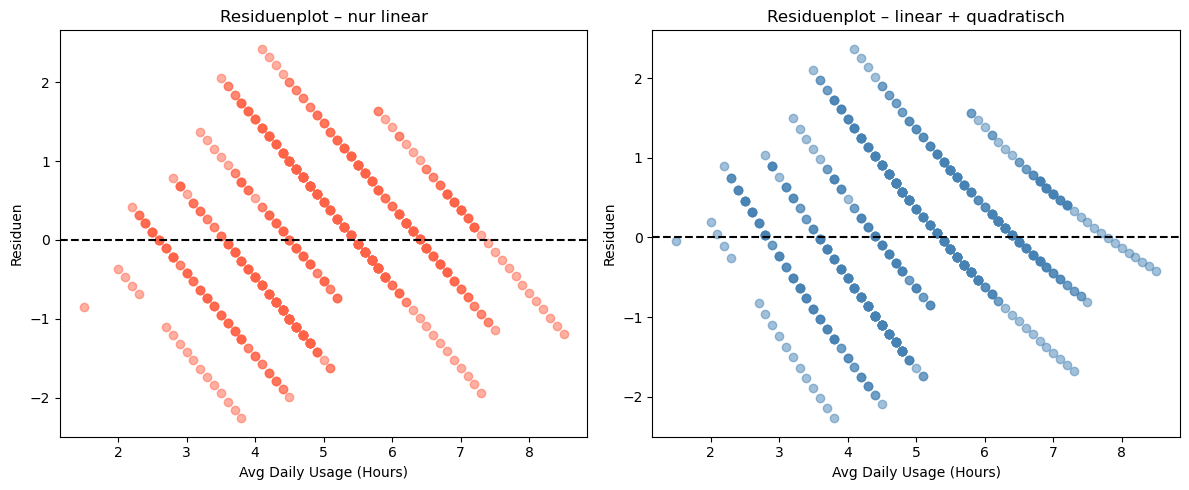

In [32]:
# Modell 1: Nur linear
model_linear = smf.ols("Addicted_Score ~ Avg_Daily_Usage_Hours", data=df).fit()
df["resid_linear"] = model_linear.resid
df["fitted_linear"] = model_linear.fittedvalues

# Modell 2: Linear + quadratisch
model_quad = smf.ols("Addicted_Score ~ Avg_Daily_Usage_Hours + Usage_Squared", data=df).fit()
df["resid_quad"] = model_quad.resid
df["fitted_quad"] = model_quad.fittedvalues

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Residuenplot: lineares Modell
axs[0].scatter(df["Avg_Daily_Usage_Hours"], df["resid_linear"], alpha=0.5, color="tomato")
axs[0].axhline(0, color="black", linestyle="--")
axs[0].set_title("Residuenplot – nur linear")
axs[0].set_xlabel("Avg Daily Usage (Hours)")
axs[0].set_ylabel("Residuen")

# Residuenplot: quadratisches Modell
axs[1].scatter(df["Avg_Daily_Usage_Hours"], df["resid_quad"], alpha=0.5, color="steelblue")
axs[1].axhline(0, color="black", linestyle="--")
axs[1].set_title("Residuenplot – linear + quadratisch")
axs[1].set_xlabel("Avg Daily Usage (Hours)")
axs[1].set_ylabel("Residuen")

plt.tight_layout()
plt.show()


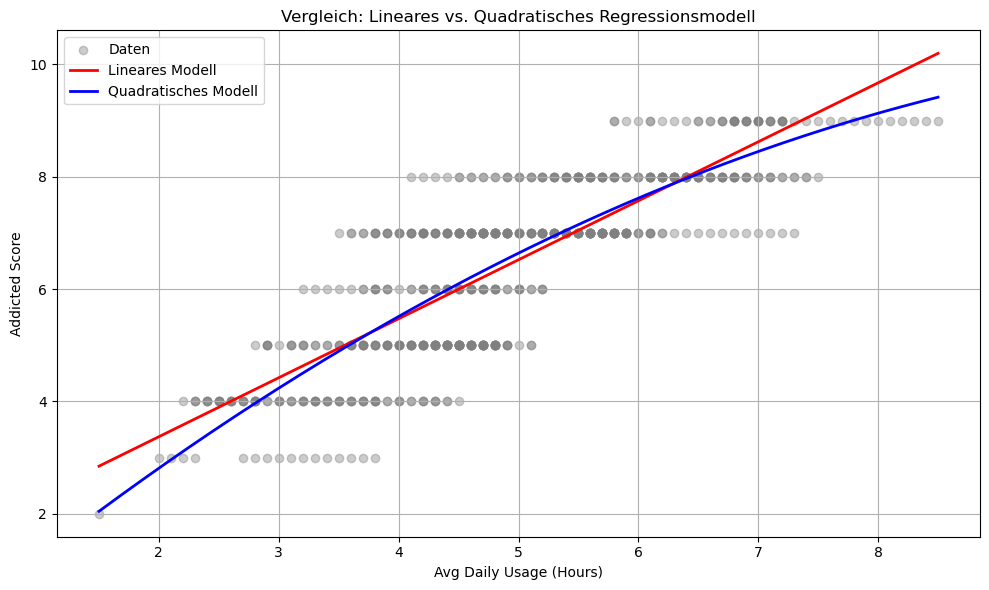

In [33]:
# Vorhersagewerte berechnen
x_vals = np.linspace(df["Avg_Daily_Usage_Hours"].min(), df["Avg_Daily_Usage_Hours"].max(), 300)
x_df_linear = pd.DataFrame({"Avg_Daily_Usage_Hours": x_vals})
x_df_quad = pd.DataFrame({
    "Avg_Daily_Usage_Hours": x_vals,
    "Usage_Squared": x_vals ** 2
})

y_pred_linear = model_linear.predict(x_df_linear)
y_pred_quad = model_quad.predict(x_df_quad)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df["Avg_Daily_Usage_Hours"], df["Addicted_Score"], alpha=0.4, label="Daten", color="gray")
plt.plot(x_vals, y_pred_linear, label="Lineares Modell", color="red", linewidth=2)
plt.plot(x_vals, y_pred_quad, label="Quadratisches Modell", color="blue", linewidth=2)
plt.xlabel("Avg Daily Usage (Hours)")
plt.ylabel("Addicted Score")
plt.title("Vergleich: Lineares vs. Quadratisches Regressionsmodell")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()